In [ ]:
from models.tree import CatBoost
from models.baseline import Baseline
from utils.usage_loader import initial_feature_names
from utils.encoder import encode_column
from sklearn.utils import shuffle
import numpy as np
from utils.usage_loader import UsagesLoader
from metric.calculate import calculate_and_print

In [ ]:
def load(usage_loader, module_path, train_size = 100000):
    usages = list(filter(lambda x: 'java.lang.Override' not in x.annotation_name, usage_loader.load_all()))
    train_usages = []
    test_usages = []
    for usage in usages:
        if module_path in usage.file_path:
            test_usages.append(usage)
        else:
            train_usages.append(usage)
    train_usages = shuffle(train_usages, random_state=123)[:train_size]
    usages = train_usages + test_usages
    raw_X = np.array([np.array(usage.features_list, dtype=object) for usage in usages])
    X = None
    all_new_names = []
    for col in range(raw_X.shape[1]):
        new_columns, new_names = encode_column(raw_X[:, col], len(train_usages),
                                               initial_feature_names[col], 100)
        if new_columns is None:
            continue
        all_new_names += new_names
        if X is None:
            X = new_columns
        else:
            X = np.concatenate((X, new_columns), axis=1)
    y = np.array([usage.annotation_name for usage in usages])

    actual_train_size = len(X) - len(test_usages)
    X_train = X[:actual_train_size]
    y_train = y[:actual_train_size]
    X_test = X[actual_train_size:]
    y_test = y[actual_train_size:]
    return X_train, X_test, y_train, y_test, all_new_names

In [ ]:
loader = UsagesLoader(['community-full/'])

In [ ]:
X_train, X_test, y_train, y_test, all_new_names = load(loader, 'java/idea-ui')

model = CatBoost(task_type='GPU', early_stopping_rounds=20, verbose=True, iterations=500, learning_rate=0.05)

calculate_and_print(X_train, X_test, y_train, y_test, Baseline())
calculate_and_print(X_train, X_test, y_train, y_test, model)

In [ ]:
X_train, X_test, y_train, y_test, all_new_names = load(loader, 'java/java-psi-api')

model = CatBoost(task_type='GPU', early_stopping_rounds=20, verbose=True, iterations=500, learning_rate=0.05)

calculate_and_print(X_train, X_test, y_train, y_test, Baseline())
calculate_and_print(X_train, X_test, y_train, y_test, model)

In [ ]:
loader = UsagesLoader(['spring-full/'])

In [ ]:
X_train, X_test, y_train, y_test, all_new_names = load(loader, 'spring-jdbc')

model = CatBoost(task_type='GPU', early_stopping_rounds=20, verbose=True, iterations=500, learning_rate=0.05)

calculate_and_print(X_train, X_test, y_train, y_test, Baseline())
calculate_and_print(X_train, X_test, y_train, y_test, model)

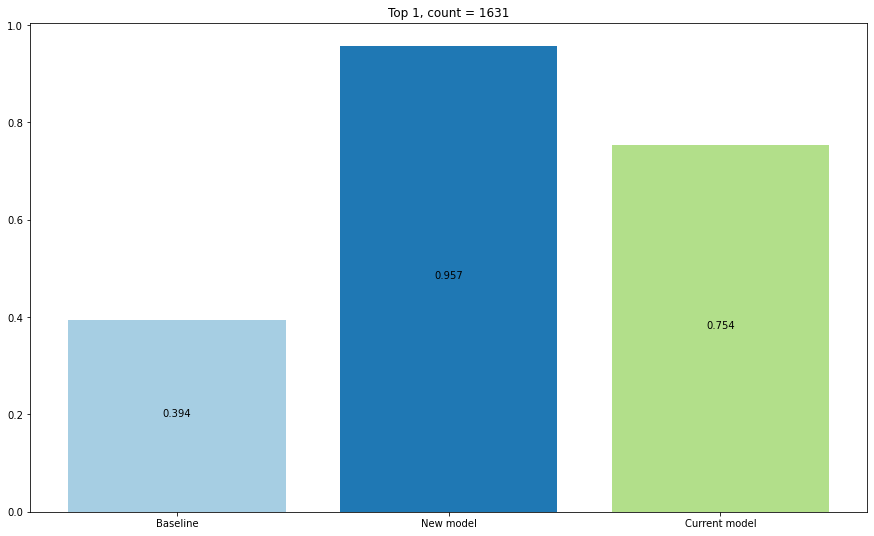

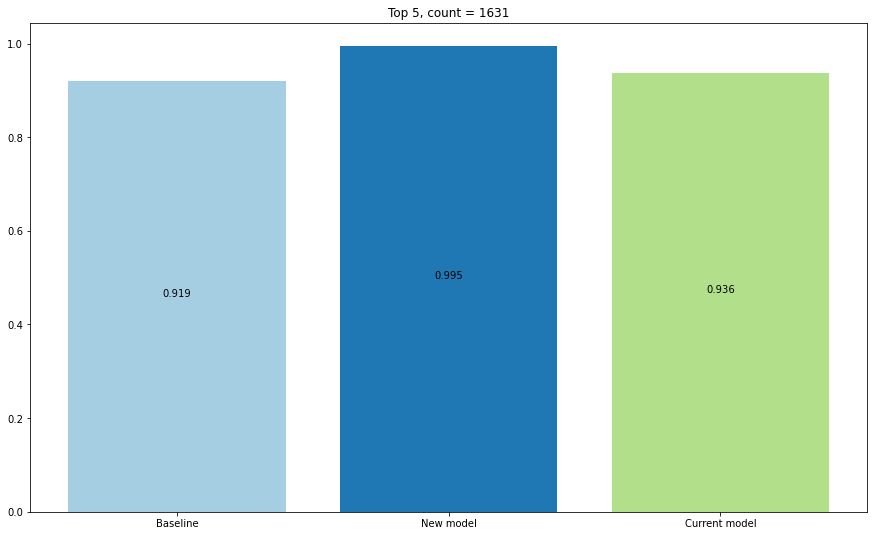

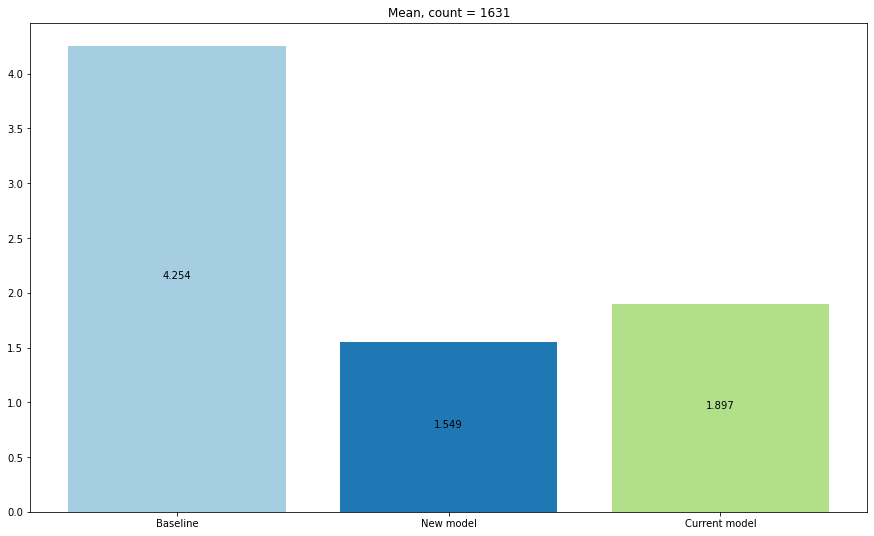

In [20]:
import matplotlib.pyplot as plt

def plot(names, values, title):
    plt.figure(figsize=(15, 9))
    plt.bar(names, values, color=plt.get_cmap('Paired').colors)
    plt.title(title)
    for i in range(len(names)):
        plt.text(i, values[i]/2, values[i], ha = 'center')
    plt.show()

# java/idea-ui
names = ['Baseline', 'New model', 'Current model']
top1 = [0.655, 0.737, 0.599]
top5 = [0.888, 0.971, 0.939]
mean = [3.839, 1.727, 3.976]

# plot(names, top1, 'Top 1, count = 3238')
# plot(names, top5, 'Top 5, count = 3238')
# plot(names, mean, 'Mean, count = 3238')

# java/java-psi-api
top1 = [0.652, 0.780, 0.659]
top5 = [0.893, 0.976, 0.976]
mean = [5.409, 3.472, 2.367]

# plot(names, top1, 'Top 1, count = 3560')
# plot(names, top5, 'Top 5, count = 3560')
# plot(names, mean, 'Mean, count = 3560')

# spring-jdbc
top1 = [0.394, 0.957, 0.754]
top5 = [0.919, 0.995, 0.936]
mean = [4.254, 1.549, 1.897]

# plot(names, top1, 'Top 1, count = 1631')
# plot(names, top5, 'Top 5, count = 1631')
# plot(names, mean, 'Mean, count = 1631')